In [4]:
import os
import cv2
import numpy as np
import pickle as pk

In [5]:
import tensorflow as tf
a= 'C:/Users/user/ANACONDA TESTFILE/datasets/cifar10-py/data_batch_1'

In [6]:
with open(a, mode='rb') as f:
    data = pk.load(f, encoding='bytes')

In [10]:
data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [8]:
raw_img = data[b'data']
class_index = np.array(data[b'labels'])

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]
(10000, 3072)


In [11]:
print(raw_img)
print(raw_img.shape)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]
(10000, 3072)


In [19]:
c=raw_img[0]
c.shape

(3072,)

In [22]:
d=c.reshape(32,32,3)

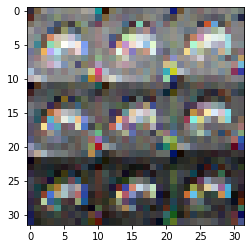

In [23]:
plt.imshow(cv2.cvtColor(d, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
IMG=raw_img.reshape(10000,32,32,3)
len(IMG)

10000

In [30]:
#이미지 반전
datasetTrain=[]
for i in range(len(IMG)) :
    datasetTrain.append( cv2.flip(IMG[i], 0))
    datasetTrain.append( cv2.flip(IMG[i], 1))
    datasetTrain.append( cv2.flip(IMG[i], -1))

In [33]:
len(datasetTrain)

30000

In [34]:
#블러
for i in range(len(IMG)) :
    
    datasetTrain.append( cv2.blur(IMG[i], (5,5)))


In [42]:
#random_brightness
gamma = 1.5

# lookup테이블의 작성
lut = np.zeros((256,1), dtype = 'uint8')
for i in range(len(IMG)) :
    for j in range(len(lut)) :
        lut[j][0] = 255 * pow((float(j)/255), (1.0/gamma));
    gamma_img =cv2.LUT(IMG[i], lut)
    datasetTrain.append(gamma_img )
    